In [1]:
from pathlib import Path
import pandas as pd
import plotnine as p9
from datetime import date
import numpy as np
import statsmodels.api as sm
import re
import seaborn as sns
import patsy
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read COVID - National - Daily.csv
national = pd.read_csv("COVID - National - Daily.csv",parse_dates= {"date" : ["year","month","day"]})
national

,date,new_case_count,case_count,new_death_count,death_count,new_test_count,test_count,new_vaccine_count,vaccine_count,new_fullvaccine_count,...,new_case_rate,case_rate,new_death_rate,death_rate,new_test_rate,test_rate,new_vaccine_rate,vaccine_rate,new_fullvaccine_rate,fullvaccine_rate
0,2020-01-21,.,1,.,0,.,.,.,.,.,...,.,0.000305,.,0.0,.,.,.,.,.,.
1,2020-01-22,0,1,.,0,.,1,.,.,.,...,0,0.000305,.,0.0,.,0.000305,.,.,.,.
2,2020-01-23,0,1,.,0,1,2,.,.,.,...,0,0.000305,.,0.0,0.000305,0.000457,.,.,.,.
3,2020-01-24,0,2,.,0,1,2,.,.,.,...,0,0.000609,.,0.0,0.000152,0.000508,.,.,.,.
4,2020-01-25,0,3,.,0,0,2,.,.,.,...,0,0.000914,.,0.0,0.000102,0.000533,.,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,2021-11-12,79318,46416544,1118,753478,1357374,667860417,375578,220581285,183168,...,24.2,14141.000000,0.341,230.0,414,203467,0.114,67.2,0.0558,58.1
662,2021-11-13,83511,46500054,1128,754605,1490209,669350636,406062,221124832,183258,...,25.4,14167.000000,0.344,230.0,454,203921,0.124,67.4,0.0558,58.1
663,2021-11-14,83742,46583796,1129,755735,1492824,670843460,415325,221564063,178550,...,25.5,14192.000000,0.344,230.0,455,204376,0.127,67.5,0.0544,58.2
664,2021-11-15,86909,46670706,1126,756861,1438307,672281767,446264,222079092,177021,...,26.5,14218.000000,0.343,231.0,438,204814,0.136,67.7,0.0539,58.2


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarnin

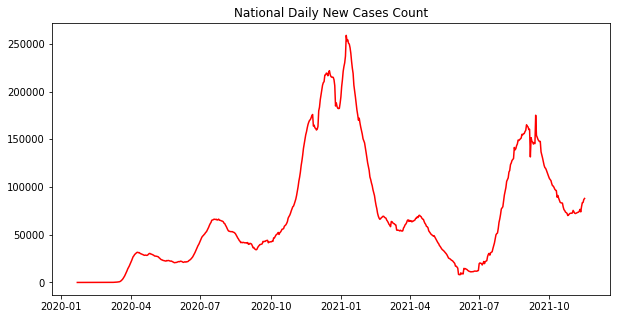

In [3]:
# National Timeseries Plot New cases
national_newcases= national[national["new_case_count"]!="."].new_case_count.astype(int)
date = national[national["new_case_count"]!="."].date
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(date, national_newcases, color = 'red')
ax.set_title('National Daily New Cases Count')
plt.savefig('National_Timeseries.png')

In [4]:
print(national_newcases[450:])
print(date[450:])
national_newcases[450:].max()

national_newcases[national_newcases == 175209]
#date[[601]]

451    68932
452    67349
453    66390
454    66117
455    63788
       ...  
661    79318
662    83511
663    83742
664    86909
665    87990
Name: new_case_count, Length: 215, dtype: int64
451   2021-04-16
452   2021-04-17
453   2021-04-18
454   2021-04-19
455   2021-04-20
         ...    
661   2021-11-12
662   2021-11-13
663   2021-11-14
664   2021-11-15
665   2021-11-16
Name: date, Length: 215, dtype: datetime64[ns]


601    175209
Name: new_case_count, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


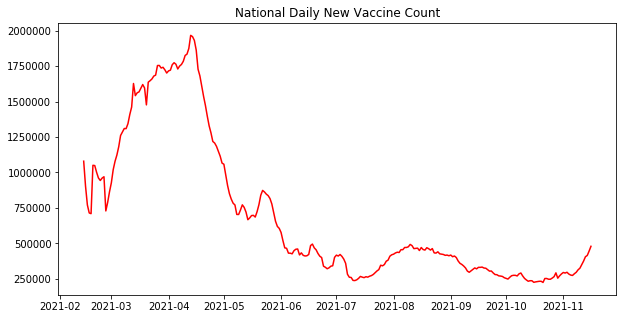

In [5]:
# National Timeseries Plot New Vaccine
national_newvac= national[national["new_vaccine_count"]!="."].new_vaccine_count.astype(int)
date= national[national["new_vaccine_count"]!="."].date
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(date, national_newvac, color = 'red')
ax.set_title('National Daily New Vaccine Count')
plt.savefig('National_Vaccine.png')

In [6]:
print(national_newvac)
print(date)
national_newvac.max()

national_newvac[national_newvac == 1966127]
#date[[448]]

390    1079440
391     903439
392     771014
393     714650
394     709831
        ...   
661     375578
662     406062
663     415325
664     446264
665     479723
Name: new_vaccine_count, Length: 276, dtype: int64
390   2021-02-14
391   2021-02-15
392   2021-02-16
393   2021-02-17
394   2021-02-18
         ...    
661   2021-11-12
662   2021-11-13
663   2021-11-14
664   2021-11-15
665   2021-11-16
Name: date, Length: 276, dtype: datetime64[ns]


448    1966127
Name: new_vaccine_count, dtype: int64

In [7]:
# index of rows with data
index1 = list(national.vaccine_rate[national.vaccine_rate!= '.'].index) 
index2 = list(national.new_case_count[national.new_case_count!= '.'].index)
index = sorted(list(set(index1).intersection(set(index2))))

In [8]:
# select nonempty data
subset = national.iloc[index]
subset["vaccine_rate"] = subset["vaccine_rate"].astype(float)
subset["new_case_count"] =subset["new_case_count"].astype(int)

<ipython-input-8-83433a8478e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-8-83433a8478e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [9]:
# linear regression: new_case_count ~ vaccine_rate
import statsmodels.formula.api as smf 
res_ols = smf.ols('new_case_count ~ vaccine_rate', data=subset).fit()
res_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         new_case_count   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     26.24
Date:                Sun, 12 Dec 2021   Prob (F-statistic):           5.69e-07
Time:                        15:11:08   Log-Likelihood:                -3333.2
No. Observations:                 277   AIC:                             6670.
Df Residuals:                     275   BIC:                             6678.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3.314e+04   7783.157      4.258      0.000    1.78e+04    4.85e+04
vaccine_rate   773.8903    151.088      5.122      0.000     476.454    1071.326
==============================================================================
Omnibus:                       17.517   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.161
Skew:                           0.193   Prob(JB):                       0.0169
Kurtosis:                       2.253   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

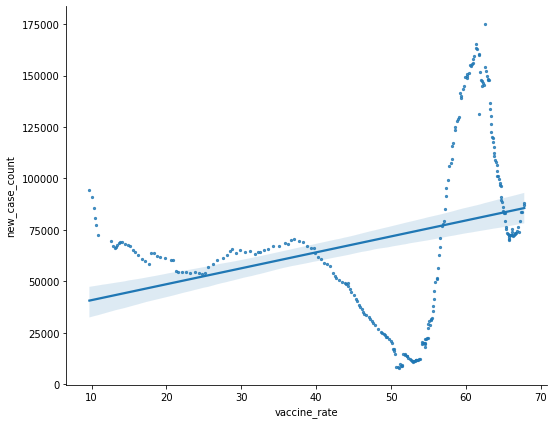

In [11]:
# linear regression plot: new_case_count ~ vaccine_rate
sns.lmplot(x="vaccine_rate", y="new_case_count", data=subset,scatter_kws={"s": 5},height=6, aspect=1.3)
plt.savefig('national.png')

In [12]:
subset["new_case_count"].max()

175209